# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [ ]:
df = pd.read_csv('data_for_predictions.csv')
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_discount_energy,...,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,0.0,...,18.590255,7.450670,26.040925,0,0,1,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,0.0,...,44.311375,0.000000,44.311375,1,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,0.0,...,44.385450,0.000000,44.385450,0,0,1,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,0.0,...,44.400265,0.000000,44.400265,0,0,0,1,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2010-01-13,2016-03-07,2010-01-13,2015-03-09,2.650065,0.0,...,16.275263,8.137629,24.412893,1,0,0,0,1,0,0


In [4]:
pred_df = df.select_dtypes(include=np.number)
pred_df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,1,...,18.590255,7.450670,26.040925,0,0,1,0,0,0,1
1,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,...,44.311375,0.000000,44.311375,1,0,0,0,1,0,0
2,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,...,44.385450,0.000000,44.385450,0,0,1,0,1,0,0
3,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,...,44.400265,0.000000,44.400265,0,0,0,1,1,0,0
4,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,0,...,16.275263,8.137629,24.412893,1,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model.

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [6]:
# Make a copy of our data
train_df = pred_df.copy()

# Separate target variable from independent variables
y = pred_df['churn']
X = pred_df.drop(columns=['churn'])
print(X.shape)
print(y.shape)

(14606, 40)
(14606,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 40)
(10954,)
(3652, 40)
(3652,)


### Model training

In [8]:
model = RandomForestClassifier() 
model.fit(X_train, y_train)

RandomForestClassifier()

### Evaluation

I am going to use 3 metrics to evaluate how well this trained model is able to predict the values of the test dataset.:

- Accuracy = the ratio of correctly predicted observations to the total observations
- Precision = the ability of the classifier to not label a negative sample as positive
- Recall = the ability of the classifier to find all the positive samples

In [9]:
# Generate predictions
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [10]:
# Evaluate performance
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions):.3f}")
print(f"Precision: {metrics.precision_score(y_test, predictions):.3f}")
print(f"Recall: {metrics.recall_score(y_test, predictions):.3f}")

True positives: 27
False positives: 7
True negatives: 3290
False negatives: 328

Accuracy: 0.908
Precision: 0.794
Recall: 0.076


To optimise the model performance, I will implement `GridSearchCV` to tune the hyperparameters of the `Random Forest Classifier`.

### Hyperparameters Tuning

In [11]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": range(100, 1000, 100),
              "criterion":["gini", "entropy", "log_loss"],
              'min_samples_split': [2, 5, 10],
              }

gs = GridSearchCV(estimator=model,      
                  param_grid=param_grid,
                  scoring = 'accuracy',
                  cv=10,
                  n_jobs=-1)


gs = gs.fit(X_train, y_train)
print(f'Random Forest Classifier best model accuracy: {gs.best_score_:.3f}')

print(gs.best_params_)

best_classifier = gs.best_estimator_

print(f'Random Forest Classifier best model test accuracy: {best_classifier.score(X_test, y_test):.3f}')

Random Forest Classifier best model accuracy: 0.907
{'criterion': 'log_loss', 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Classifier best model test accuracy: 0.908


In [18]:
# Generate predictions using optimised model
final_predictions = best_classifier.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, final_predictions).ravel()

In [19]:
# Evaluate performance of optimised model
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, final_predictions):.3f}")
print(f"Precision: {metrics.precision_score(y_test, final_predictions):.3f}")
print(f"Recall: {metrics.recall_score(y_test, final_predictions):.3f}")

True positives: 25
False positives: 6
True negatives: 3291
False negatives: 330

Accuracy: 0.908
Precision: 0.806
Recall: 0.070


Overall, we're able to very accurately identify clients that do not churn, but we are not able to predict cases where clients do churn! What we are seeing is that a high % of clients are being identified as not churning when they should be identified as churning. This in turn tells me that the current set of features are not discriminative enough to clearly distinguish between churners and non-churners. 


### Model understanding

A simple way of understanding the results of a model is to look at feature importances. Feature importances indicate the importance of a feature within the predictive model, there are several ways to calculate feature importance, but with the Random Forest classifier, we're able to extract feature importances using the built-in method on the trained model. In the Random Forest case, the feature importance represents the number of times each feature is used for splitting across all trees.

In [16]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': best_classifier.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


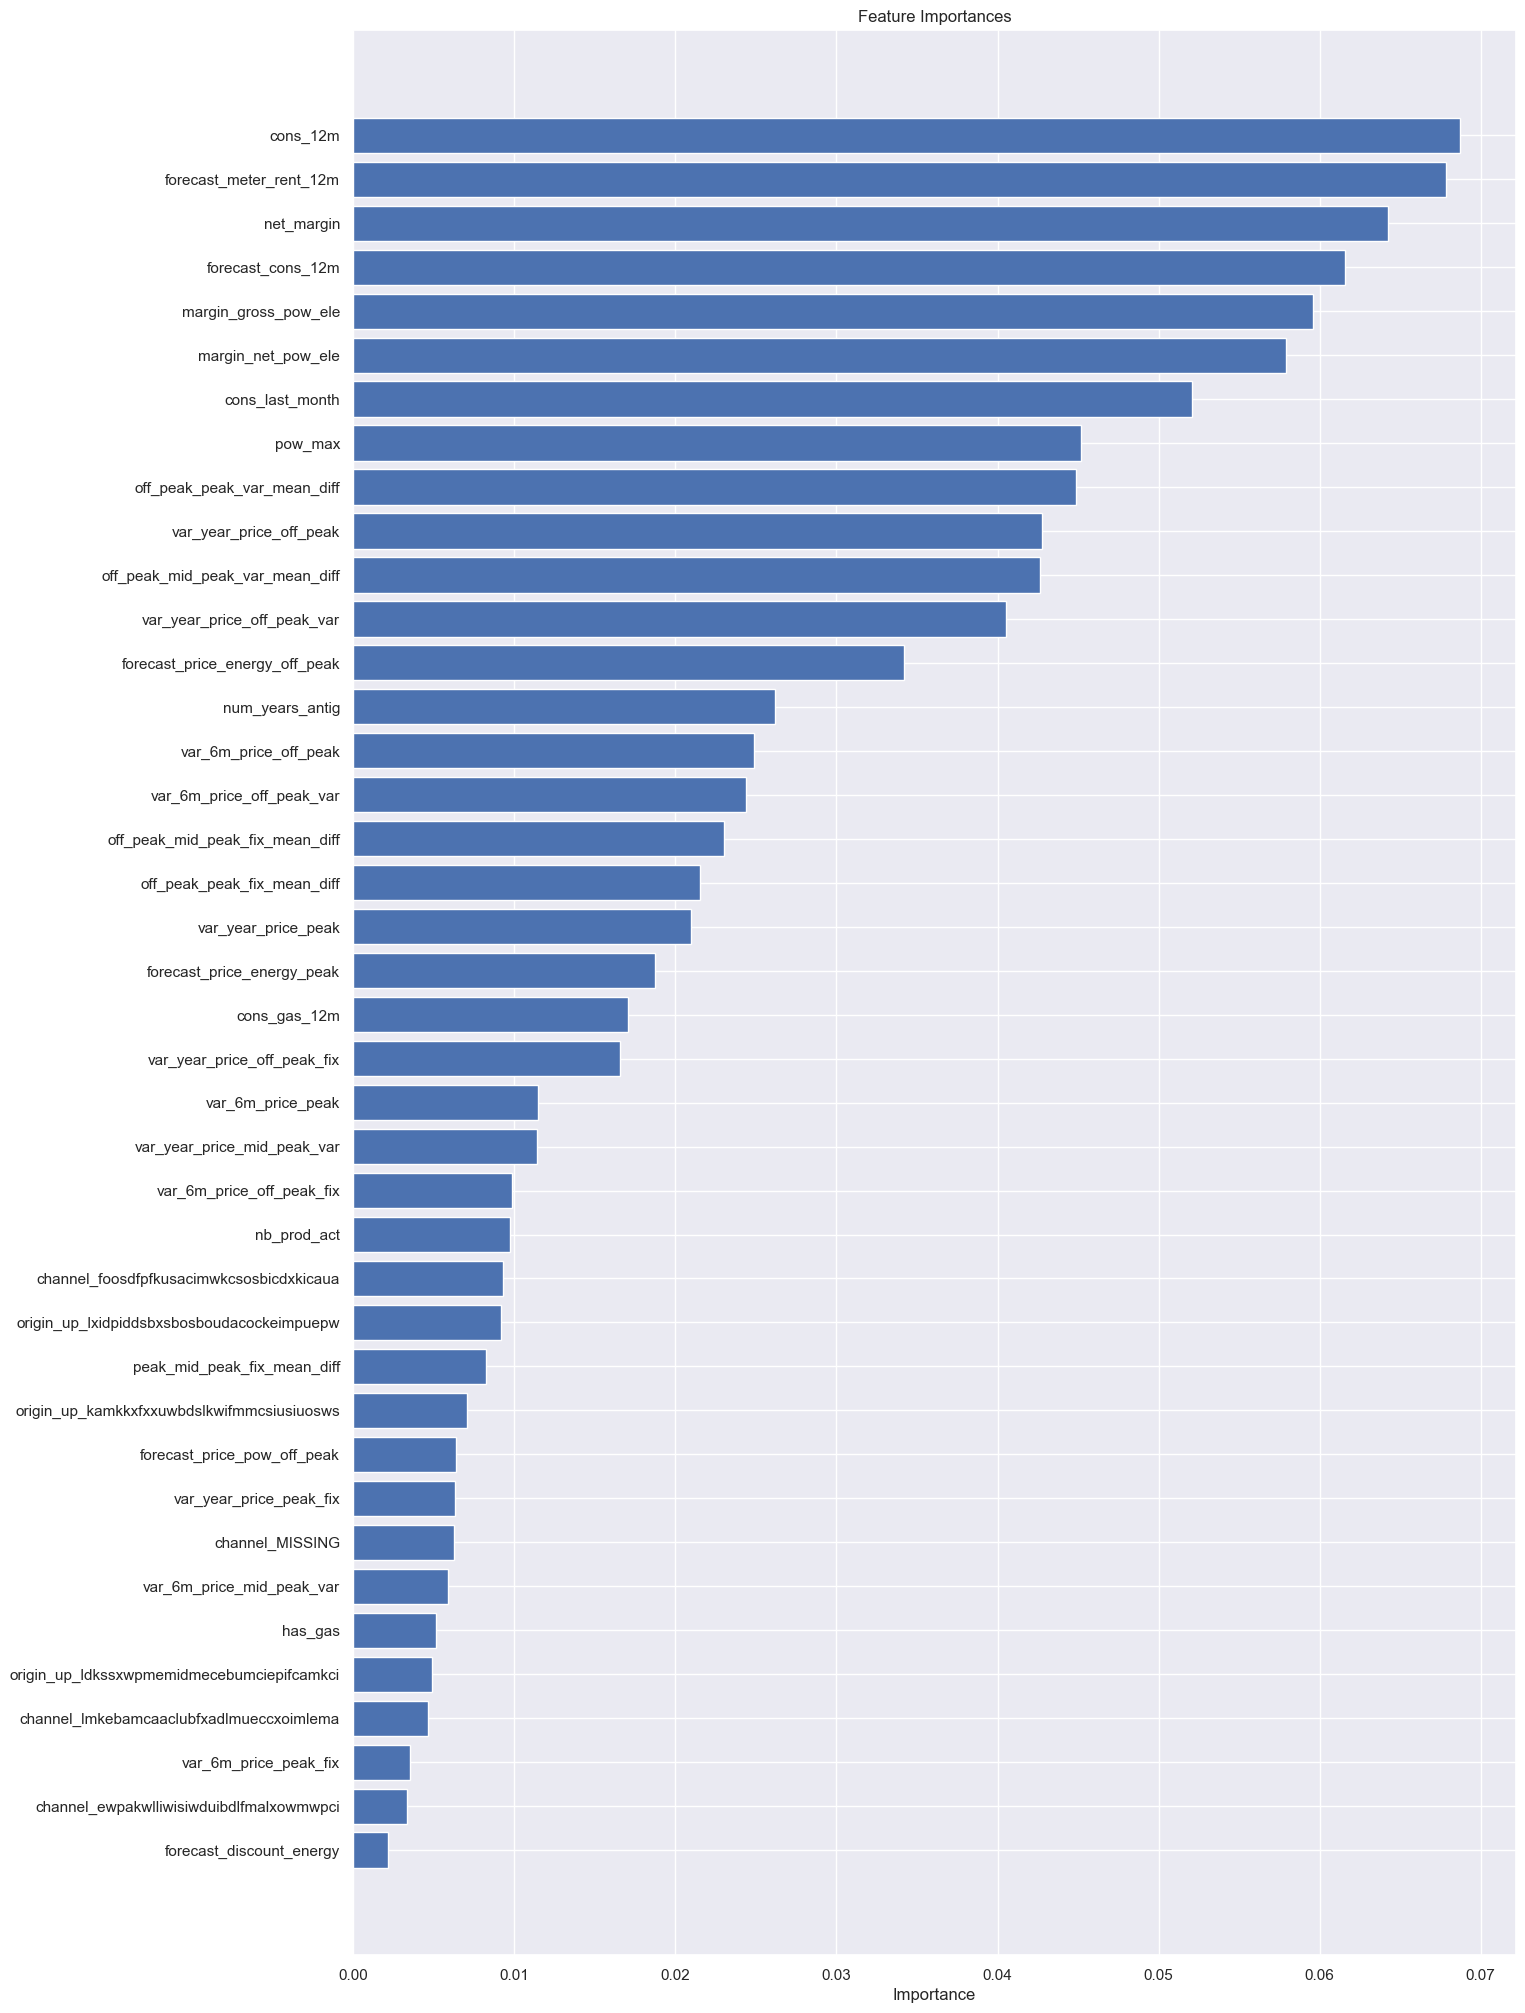

In [17]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Net margin, consumption over 12 months and forecasted bill of meter rental for the next 12 months are top drivers for churn in this model
- Margin on power subscription and tenure also are influential drivers
- Price difference between 
- Our price sensitivity features are scattered around but are not the main driver for a customer churning

Relating back to our original hypothesis:  <b>Is churn driven by the customers' price sensitivity?</b>

Based on the output of the feature importances, it is not a main but a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.